## Eric LeVally
### Lab 3

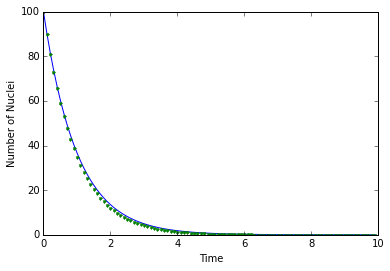

In [87]:
import math
import numpy as np
%matplotlib inline
from pylab import plot,show,ylim,xlim,xlabel,ylabel
import matplotlib.pylab as plt 

def nuclei_exact(N1,t,lamb):
    
    '''This function is used to calculate the exact number of radioactive 
    nuclei of a radioactive substance left after a specific amount of time'''
     
    N2 = N1*math.exp(-lamb*t)
    return N2

def nuclei_approx(N1,deltaT,lamb):
    
    '''This function is used to calculate the approximate number of
    radioactive nuclei of a radioactive sample remaining after a 
    specific amount of time'''
    
    N2 = -lamb*N1*deltaT+N1
    return N2

steps = 100
N1 = 100
lamb = 1
N2_exact = np.zeros(100,float)    # Creating arrays and assigning variables
N2_approx = np.zeros(100,float)
time = np.zeros(100,float)
N2_approx[0] = 100
N2_exact[0] = 100
time[0] = 0
t = 0.1
deltaT = .1                       # How much time passes between data collection

for i in range(1,steps):          # A for loop that generates and stores the data for future plotting
    N2 = nuclei_exact(N1,t,lamb)  # Calls the function to perform the caluclutaions
    time[i] = t  
    t += deltaT                   # Changes the value of t for each calculation
    N2_exact[i] = N2              # Stores the value of N2 in the exact array
    if N2<=0:
        break                     # Causes the loop to stop so that there are no negative values.
t = 0

for j in range(1,steps):
    N2 = nuclei_approx(N1,deltaT,lamb)
    t += deltaT
    N2_approx[j] = N2
    N1 = N2
    if N2 <= 0:
        break
xlabel("Time")
ylabel("Number of Nuclei")
plt.plot(time,N2_exact)
plt.plot(time,N2_approx,".")
plt.show()

This is a graph plotting the exact analytical data for a radioactive substance with a lambda of 1.  The blue line represents the 
exact analytical data, and the green dots represent the approximate data.  It is clear that the two line up very closely when lamda = 1, N1 = 100, and deltaT = 0.1.  As the deltaT gets larger, the two plots line up less and less.  
A).  Anything larger than 0.3 seconds is too great a difference.  If lambda is larger than 1, the lines also will not match up
B).  A value of 0.01 for deltaT gives amazing results. If lamda is 0.1 it matches up perfectly.

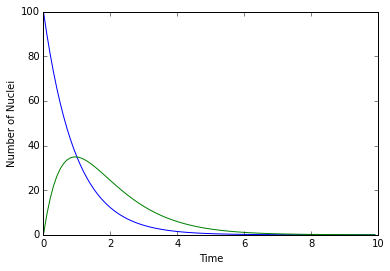

In [113]:
def nuclei_Nb(lamb_A, lamb_B, N1A, N1B, deltaT):
    N2B = (lamb_A*N1A - lamb_B*N1B)*deltaT + N1B
    
    '''This function is used to calculate the values of N2B.
    N2B changes because the NA nuclei decay into NB nuclei.'''

    return N2B




N2A_approx = np.zeros(100,float)
N2B_approx = np.zeros(100,float)
lamb_A = 1
lamb_B = 1
N1A = 100
N1B = 0
deltaT = 0.1
time2 = np.zeros(100,float)
N2A_approx[0] = 100
N2B_approx[0] = 0
time2[0] = 0
tA = 0.1
deltaT = .1

for k in range(1, steps):
    N2A = nuclei_approx(N1A,deltaT,lamb_A)
    time2[k] = tA  
    tA += deltaT
    N2A_approx[k] = N2A
    N1A = N2A
    if N2A <= 0:
        break

for m in range(1, steps):
    N2B = nuclei_Nb(lamb_A, lamb_B, N2A_approx[m], N1B, deltaT)
    N2B_approx[m] = N2B
    N1B = N2B
    if N2B <= 0:
        break
    
        
xlabel("Time")
ylabel("Number of Nuclei")
plt.plot(time2,N2A_approx)
plt.plot(time2,N2B_approx)
plt.show()